## 설명 가능한 머신러닝
- 교재 p.190 설명 가능한 CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

- Sequential API 를 이용하여 모델을 만든다.
- 모델은 합성곱층과 최대 풀링층 쌍을 네개 쌓는다.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape = (100, 100, 3), activation='relu',
                           kernel_size=(5, 5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
    
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 44, 44, 64)        51264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 18, 18, 64)        102464    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 9, 9, 64)        

## 특성 맵 정의

In [ ]:
ins = model.inputs
outs = model.layers[0].output
feature_map = Model(inputs=ins, outputs=outs)
feature_map.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7_input (InputLayer)  [(None, 100, 100, 3)]    0         
                                                                 
 conv2d_7 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


## 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


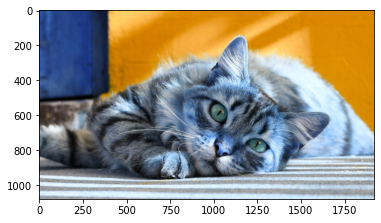

In [ ]:
CAT_IMG_PATH = '/content/drive/MyDrive/Colab Notebooks/산대특/deeplearning/ch5/data/cat.jpg'
img = cv2.imread(CAT_IMG_PATH)
plt.imshow(img)

(1, 100, 100, 3)
1/1 [==============================] - 1s 690ms/step
(1, 96, 96, 32)


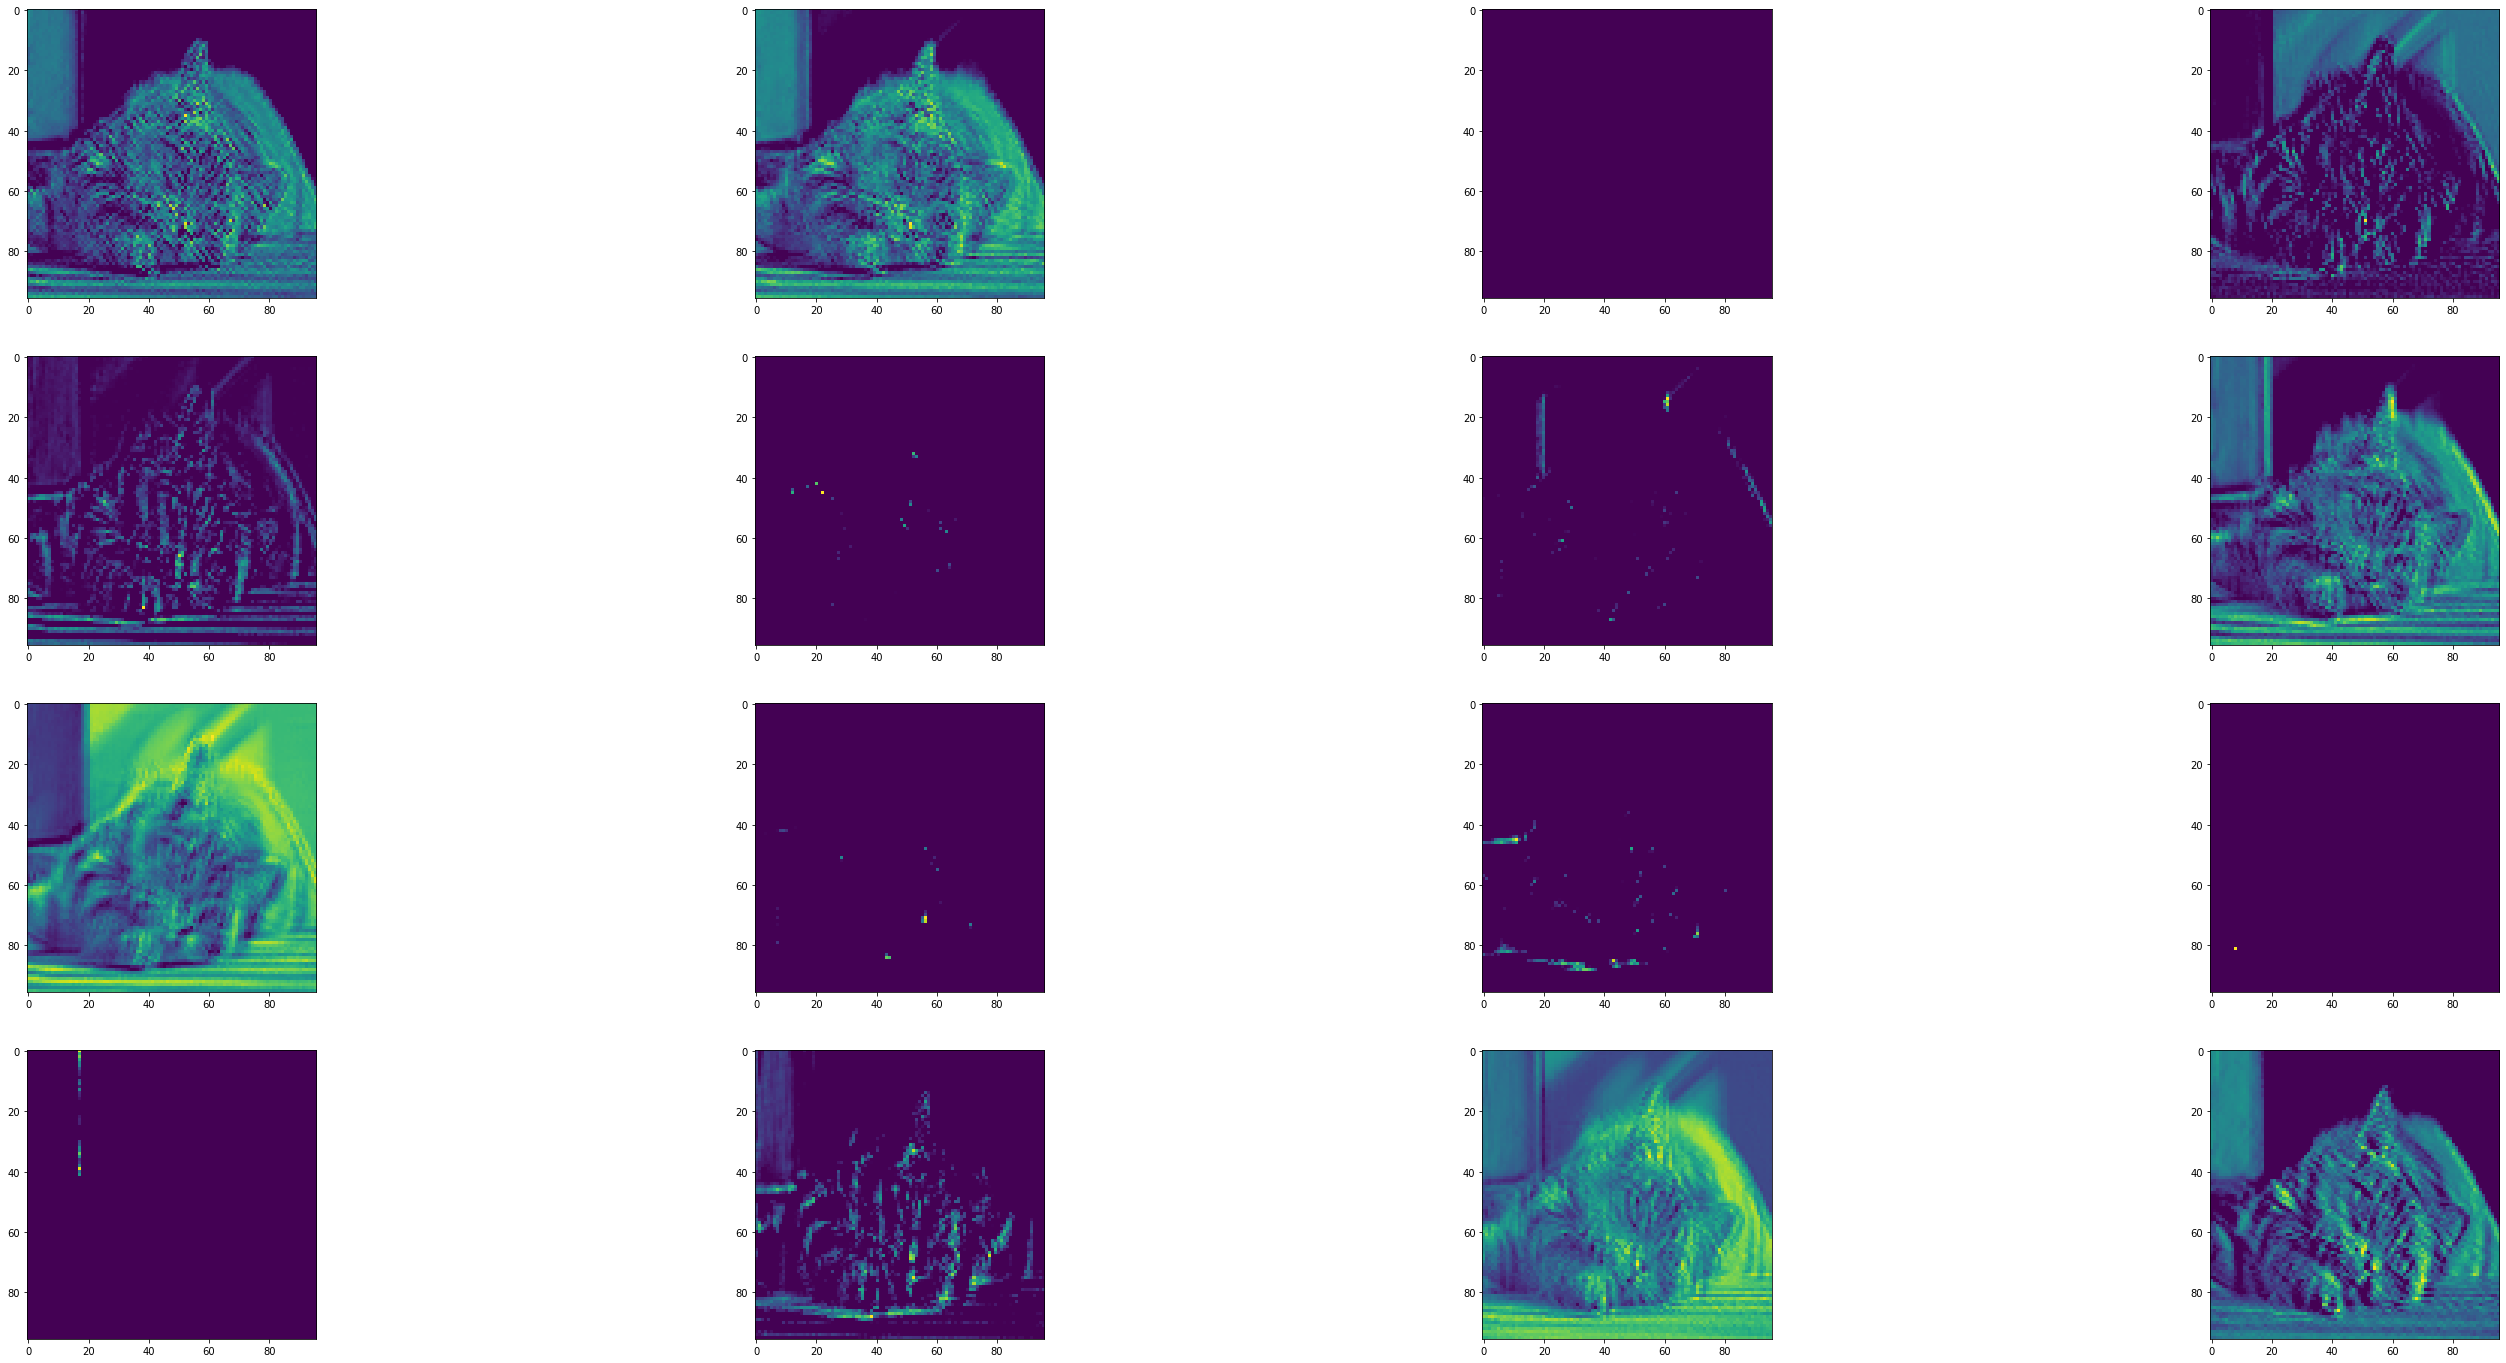

In [ ]:
img=cv2.resize(img,(100,100))               
input_img= np.expand_dims(img, axis=0)      
print(input_img.shape)                      
feature=feature_map.predict(input_img)       
print(feature.shape)                            
fig= plt.figure(figsize=(50,50))
for i in range(16):
    ax=fig.add_subplot(8,4,i+1)
    ax.imshow(feature[0,:,:,i])  

1/1 [==============================] - 0s 69ms/step


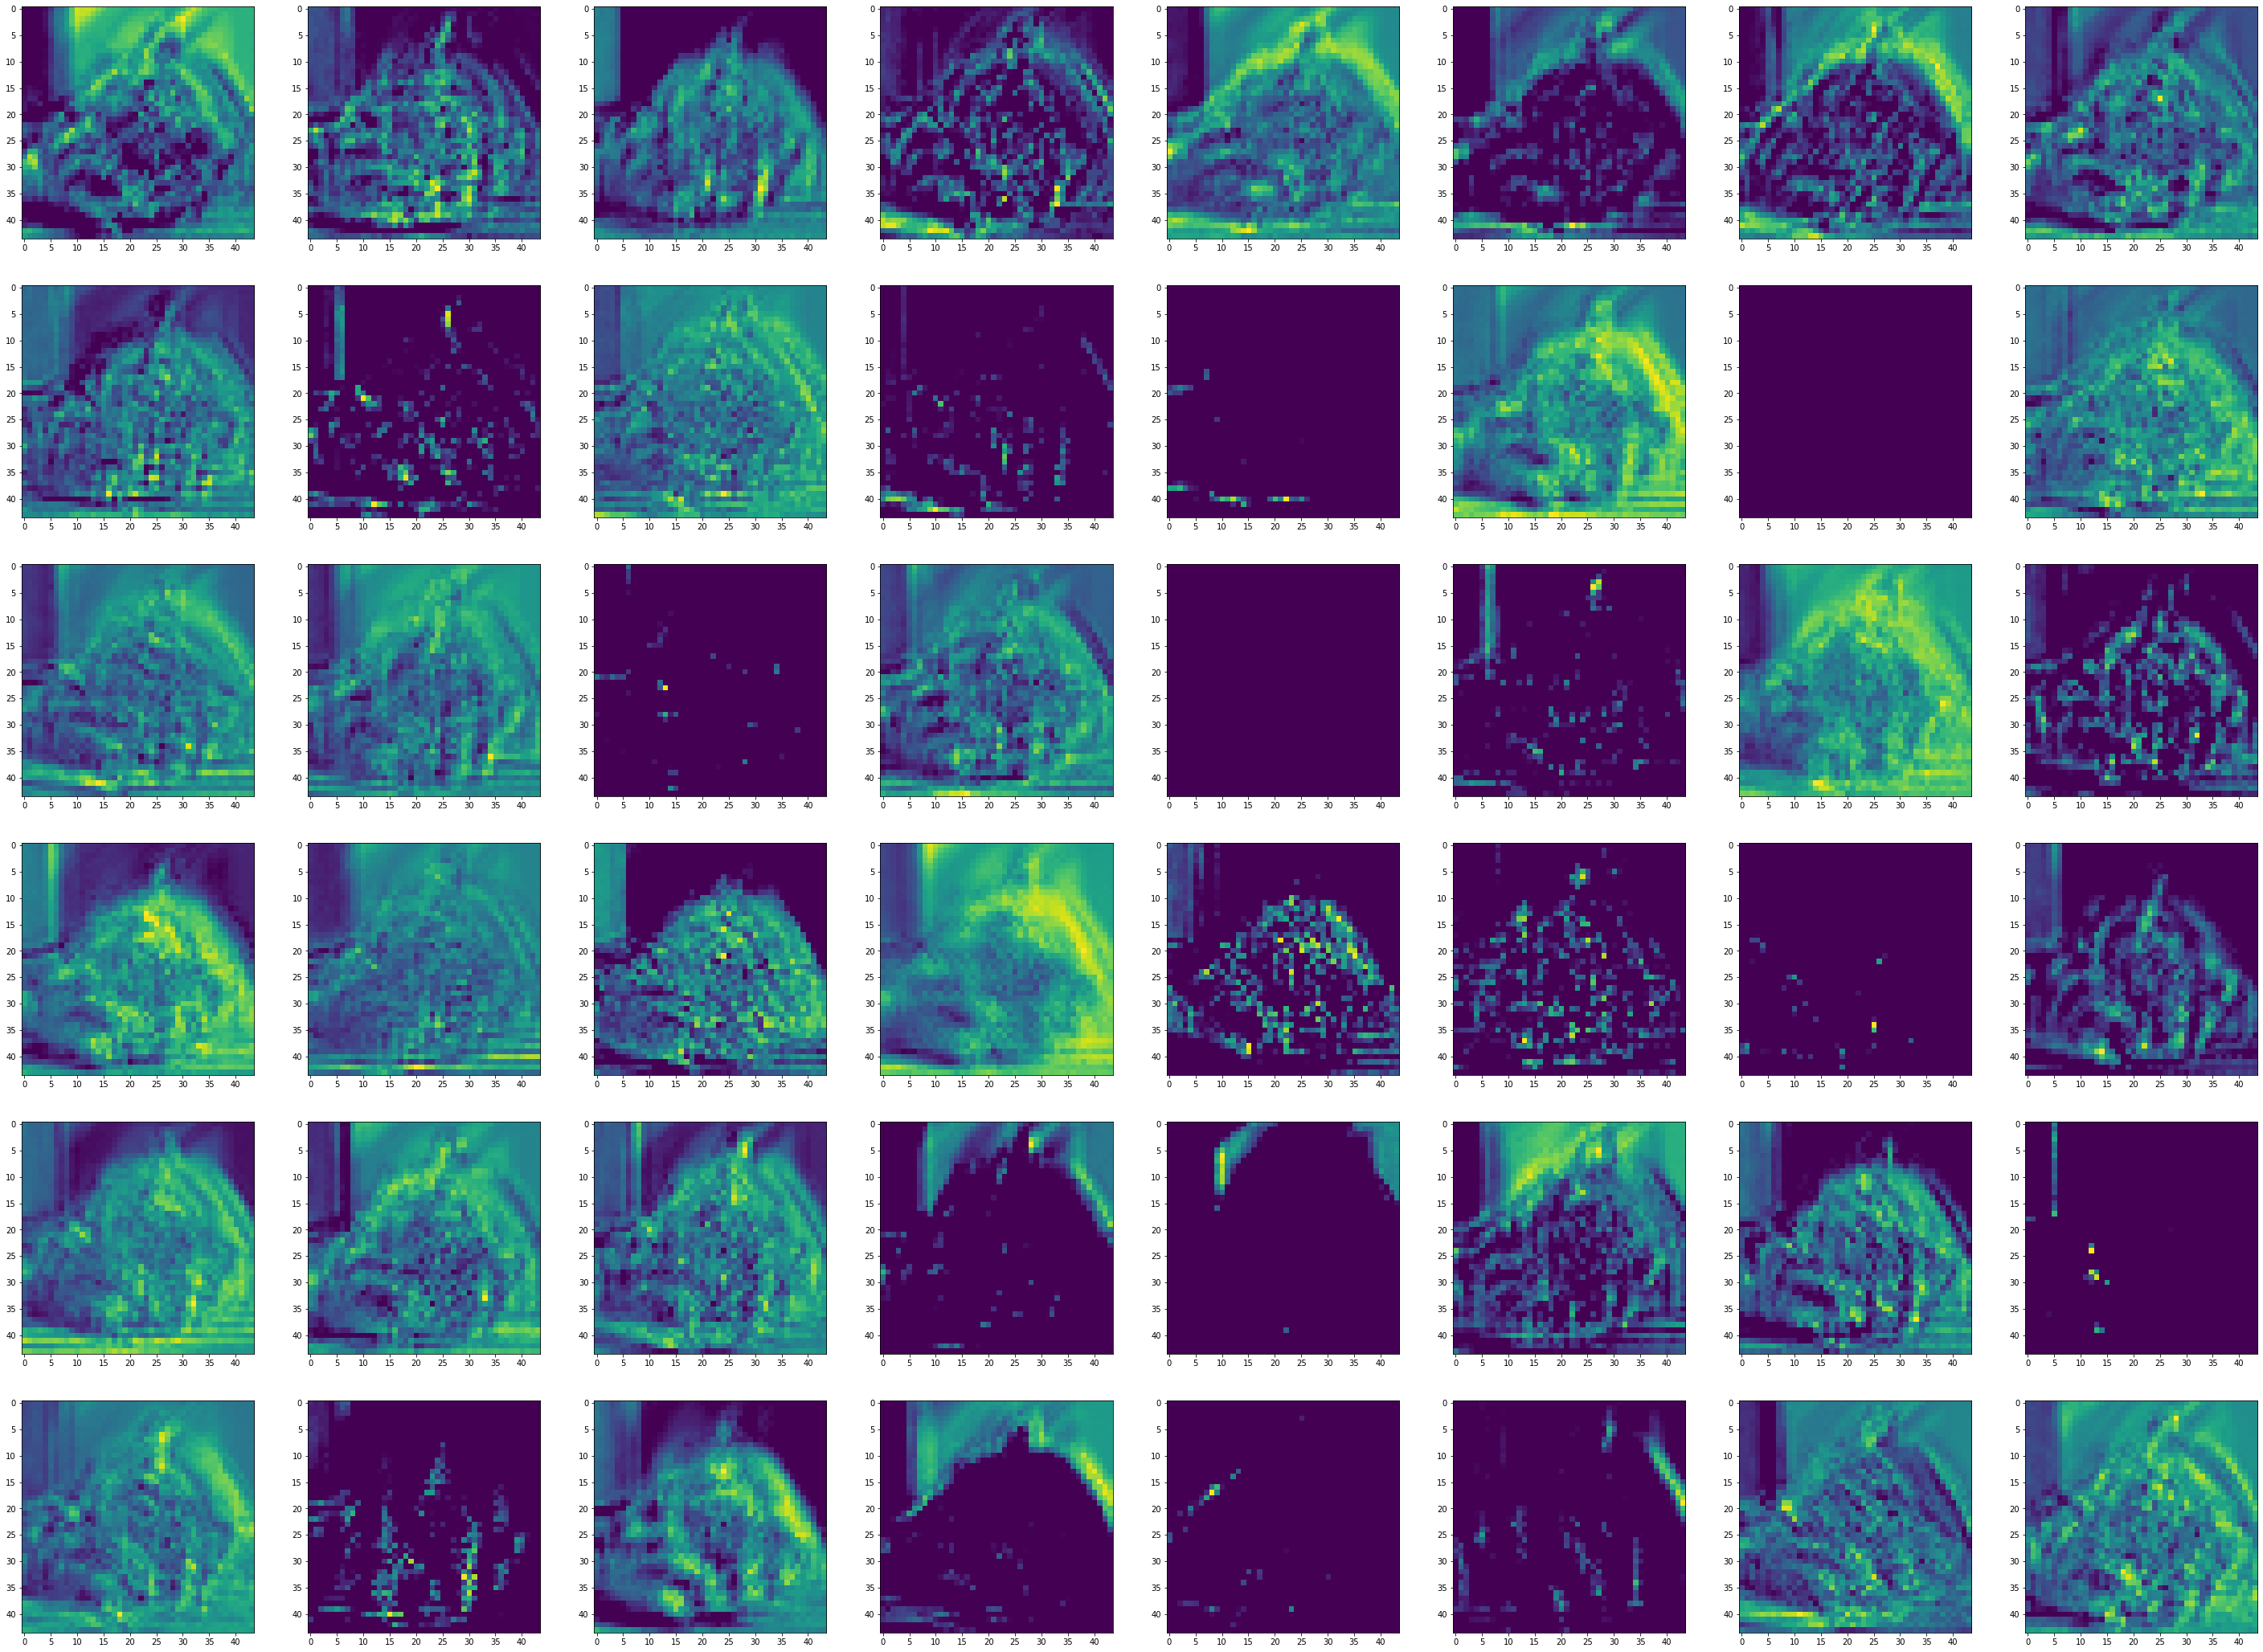

In [ ]:
ins= model.inputs 
outs= model.layers[2].output  
feature_map= Model(inputs= ins, outputs= outs)  
img=cv2.imread(CAT_IMG_PATH)                   
img=cv2.resize(img,(100,100))               
input_img= np.expand_dims(img, axis=0)   

feature=feature_map.predict(input_img)        
fig= plt.figure(figsize=(50,50))
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(feature[0,:,:,i])